# Credit Risk Modelling

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# BASIC EDA

In [4]:
df = pd.read_csv('loan_detection.csv')

In [5]:
df

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
41184,46,1,999,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
41186,44,1,999,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [6]:
df.shape

(41188, 60)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            41188 non-null  int64
 1   campaign                       41188 non-null  int64
 2   pdays                          41188 non-null  int64
 3   previous                       41188 non-null  int64
 4   no_previous_contact            41188 non-null  int64
 5   not_working                    41188 non-null  int64
 6   job_admin.                     41188 non-null  int64
 7   job_blue-collar                41188 non-null  int64
 8   job_entrepreneur               41188 non-null  int64
 9   job_housemaid                  41188 non-null  int64
 10  job_management                 41188 non-null  int64
 11  job_retired                    41188 non-null  int64
 12  job_self-employed              41188 non-null  int64
 13  job_services    

In [8]:
df.describe()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.963217,0.087623,0.253035,0.224677,0.035350,0.025736,...,0.013839,0.190031,0.206711,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335,0.112654
std,10.42125,2.770014,186.910907,0.494901,0.188230,0.282749,0.434756,0.417375,0.184665,0.158348,...,0.116824,0.392330,0.404951,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512,0.316173
min,17.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.isnull().sum()

age                              0
campaign                         0
pdays                            0
previous                         0
no_previous_contact              0
not_working                      0
job_admin.                       0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_divorced                 0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.4y               0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate             0
education_professional.course    0
education_university

# Model Building

In [10]:
x = df.drop(columns = ['Loan_Status_label'],axis=1)
y = df['Loan_Status_label']

In [11]:
x

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [12]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: Loan_Status_label, Length: 41188, dtype: int64

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [14]:
x_train

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
12556,40,2,999,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
35451,31,4,999,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
30592,59,6,999,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
17914,43,5,999,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3315,39,2,999,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,58,2,999,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
11284,37,1,999,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
38158,35,1,4,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
860,40,2,999,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [15]:
x_test

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
32884,57,1,999,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3169,55,2,999,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
32206,33,1,999,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
9403,36,4,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
14020,27,2,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12322,27,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
23440,41,7,999,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
29431,46,12,999,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
16627,31,2,999,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


# Feature scaling

In [16]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [19]:
x_train

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
12556,40,2,999,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
35451,31,4,999,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
30592,59,6,999,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
17914,43,5,999,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3315,39,2,999,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,58,2,999,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
11284,37,1,999,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
38158,35,1,4,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
860,40,2,999,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [20]:
x_train_sc

array([[-1.66930454e-03, -2.06241614e-01,  1.94660673e-01, ...,
        -3.40481710e-01,  3.98373809e-01, -1.84965343e-01],
       [-8.64094846e-01,  5.13675879e-01,  1.94660673e-01, ...,
        -3.40481710e-01,  3.98373809e-01, -1.84965343e-01],
       [ 1.81900684e+00,  1.23359337e+00,  1.94660673e-01, ...,
         2.93701532e+00, -2.51020518e+00, -1.84965343e-01],
       ...,
       [-4.80794606e-01, -5.66200360e-01, -5.14775262e+00, ...,
        -3.40481710e-01, -2.51020518e+00,  5.40641820e+00],
       [-1.66930454e-03, -2.06241614e-01,  1.94660673e-01, ...,
        -3.40481710e-01,  3.98373809e-01, -1.84965343e-01],
       [-1.05574497e+00, -2.06241614e-01,  1.94660673e-01, ...,
        -3.40481710e-01,  3.98373809e-01, -1.84965343e-01]],
      shape=(32950, 59))

In [21]:
x_test_sc

array([[ 1.62735672, -0.56620036,  0.19466067, ...,  2.93701532,
        -2.51020518, -0.18496534],
       [ 1.4357066 , -0.20624161,  0.19466067, ..., -0.34048171,
         0.39837381, -0.18496534],
       [-0.67244473, -0.56620036,  0.19466067, ...,  2.93701532,
        -2.51020518, -0.18496534],
       ...,
       [ 0.57328106,  3.39334585,  0.19466067, ...,  2.93701532,
        -2.51020518, -0.18496534],
       [-0.86409485, -0.20624161,  0.19466067, ..., -0.34048171,
         0.39837381, -0.18496534],
       [ 1.81900684, -0.20624161,  0.19466067, ..., -0.34048171,
         0.39837381, -0.18496534]], shape=(8238, 59))

# Model Selection

In [22]:
lr = LogisticRegression()
lr.fit(x_train_sc,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [23]:
print(f'Training Acurracy : {round(lr.score(x_train_sc,y_train),2)*100}%')
print(f'Test Acurracy : {round(lr.score(x_test_sc,y_test),2)*100}%')

Training Acurracy : 90.0%
Test Acurracy : 90.0%


# Decision Tree

In [25]:
dtree = DecisionTreeClassifier(max_depth=6)
dtree.fit(x_train_sc,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [26]:
print(f'Training Acurracy : {round(dtree.score(x_train_sc,y_train),2)*100}%')
print(f'Test Acurracy : {round(dtree.score(x_test_sc,y_test),2)*100}%')

Training Acurracy : 90.0%
Test Acurracy : 89.0%


# Model Training Decision Tree 

In [27]:
dtree = DecisionTreeClassifier(max_depth=5)
dtree.fit(x_train_sc,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [28]:
y_pred_train = dtree.predict(x_train_sc)
y_pred_test = dtree.predict(x_test_sc)

In [29]:
x_train[:3]

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
12556,40,2,999,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
35451,31,4,999,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
30592,59,6,999,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [30]:
y_train[:3]

12556    0
35451    0
30592    0
Name: Loan_Status_label, dtype: int64

In [31]:
y_pred_train[:3]

array([0, 0, 0])

# Model Evaluation

In [32]:
confusion_matrix(y_train,y_pred_train)

array([[28803,   442],
       [ 2806,   899]])

<Axes: >

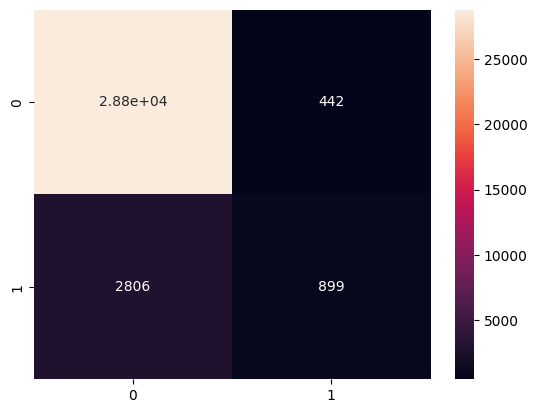

In [33]:
sns.heatmap(confusion_matrix(y_train,y_pred_train),annot = True , fmt='.4g')

In [34]:
accuracy_score(y_train,y_pred_train)

0.9014264036418816

In [35]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     29245
           1       0.67      0.24      0.36      3705

    accuracy                           0.90     32950
   macro avg       0.79      0.61      0.65     32950
weighted avg       0.88      0.90      0.88     32950



In [36]:
confusion_matrix(y_test,y_pred_test)

array([[7169,  134],
       [ 735,  200]])

<Axes: >

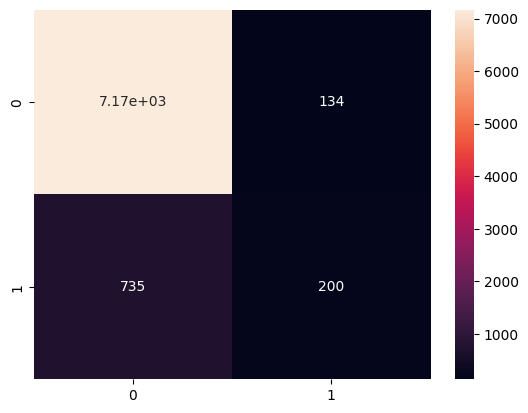

In [37]:
sns.heatmap(confusion_matrix(y_test,y_pred_test), annot=True, fmt = '.3g')

In [38]:
accuracy_score(y_test,y_pred_test)

0.8945132313668366

In [39]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.60      0.21      0.32       935

    accuracy                           0.89      8238
   macro avg       0.75      0.60      0.63      8238
weighted avg       0.87      0.89      0.87      8238



# -------------------- END --------------------------